In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

tqdm.pandas()
pd.options.display.max_colwidth = None

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('dataset/data.csv')
print(data.shape)
data.head()

(127328, 2)


,text,clickbait
0,"By Folding Cardboard In Clever Ways, This Artist Will Make You Feel Like A Kid",1
1,Pak's ex-PM Sharif's daughter Maryam arrested in corruption case,0
2,11 Things You Shouldn't Let Get You Down,1
3,RT @FiveThirtyEight: Why the Warriors are so tough to beat: http://t.co/kRRsvORJuv http://t.co/GX5ErBtuHR,0
4,Burundi radio station ban lifted as media council chair resigns,0


**Check for Missing Values**

text         0
clickbait    0
dtype: int64


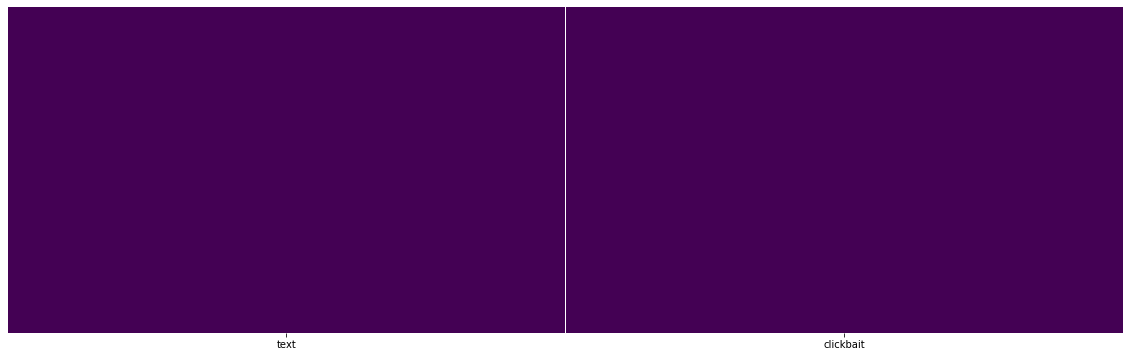

In [3]:
print(data.isnull().sum())
fig = plt.figure(figsize=(20,6))
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False, cbar=False)

**Target Class Distribution**

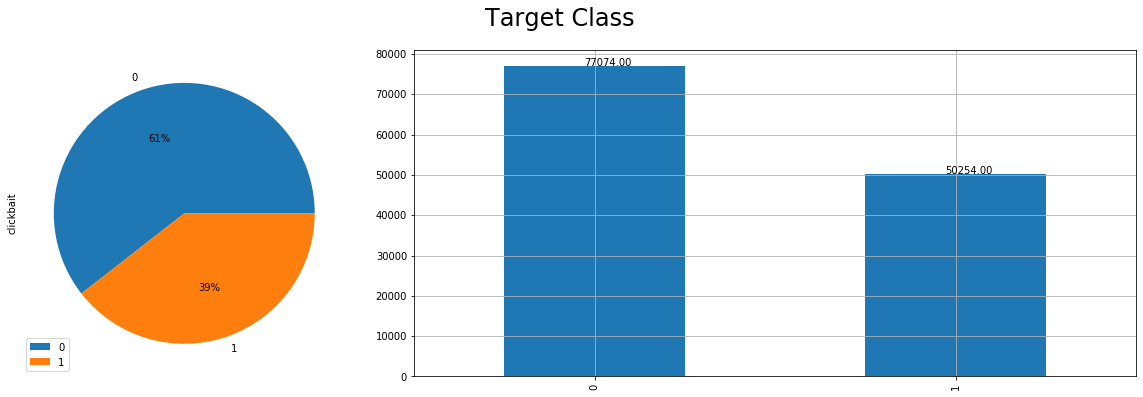

In [4]:
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Target Class', fontsize=24)
ax1 = plt.subplot2grid((1, 3), (0, 0))
data['clickbait'].value_counts().plot.pie(legend=True, autopct='%1.0f%%', ax=ax1)

ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
data['clickbait'].value_counts().plot.bar()
ax2.grid()
x_offset = -0.03
y_offset = 0.05
for p in ax2.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax2.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

**Feature Analysis**

In [5]:
from wordcloud import WordCloud, STOPWORDS

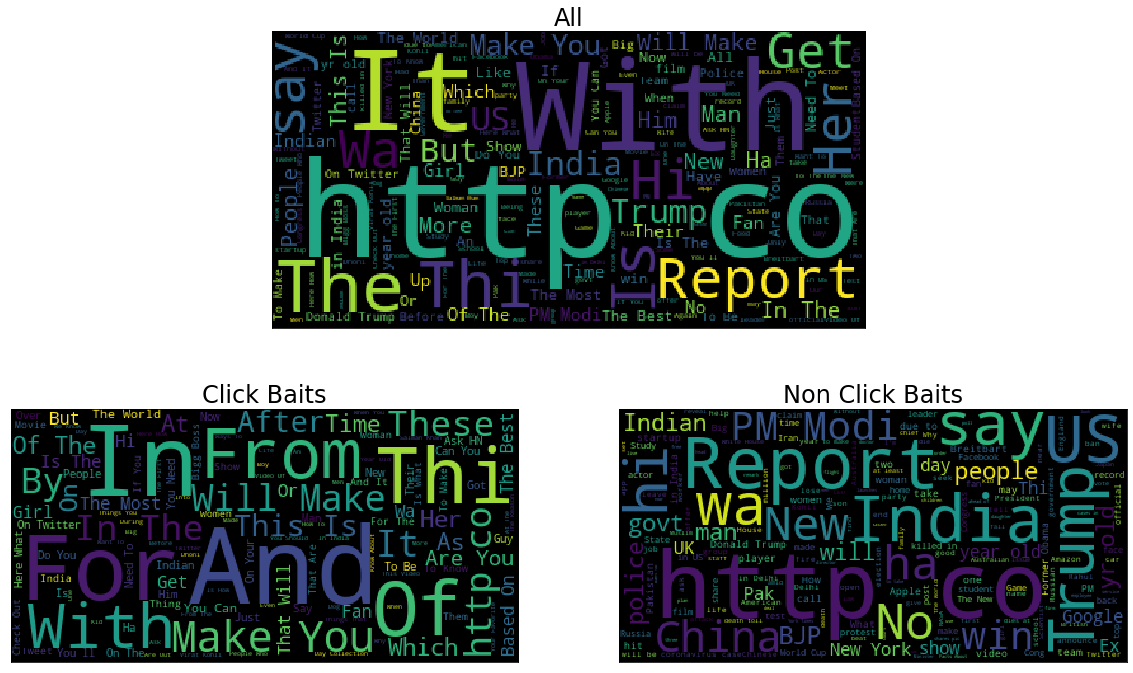

In [6]:
fig = plt.figure(figsize=(20, 12))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join((data['text'].values)))
ax1.imshow(wordcloud)
ax1.set_title('All', fontsize=24)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

ax2 = plt.subplot2grid((2, 2), (1, 0))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join((data[data['clickbait'] == 1]['text'].values)))
ax2.imshow(wordcloud)
ax2.set_title('Click Baits', fontsize=24)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=2)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join((data[data['clickbait'] == 0]['text'].values)))
ax3.imshow(wordcloud)
ax3.set_title('Non Click Baits', fontsize=24)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)

# Cleaning

In [7]:
from utils.preprocessing import cleanText

In [8]:
data['text'] = data['text'].progress_apply(lambda x : cleanText(x, True, False, True, False))

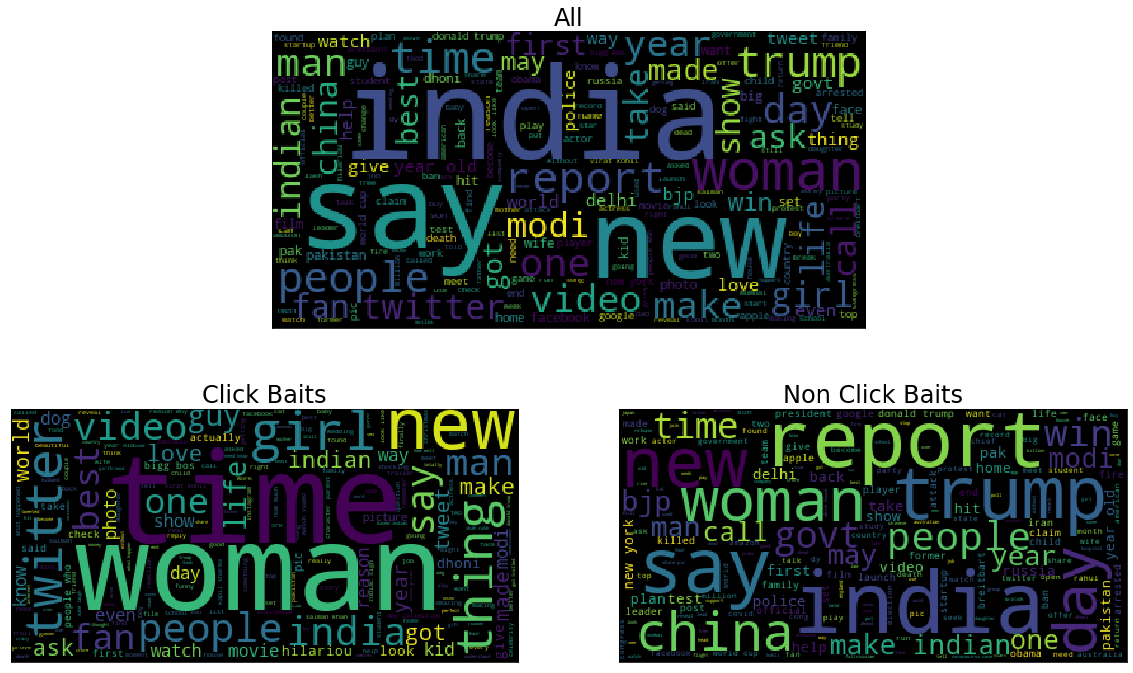

In [9]:
fig = plt.figure(figsize=(20, 12))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join((data['text'].values)))
ax1.imshow(wordcloud)
ax1.set_title('All', fontsize=24)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

ax2 = plt.subplot2grid((2, 2), (1, 0))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join((data[data['clickbait'] == 1]['text'].values)))
ax2.imshow(wordcloud)
ax2.set_title('Click Baits', fontsize=24)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=2)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join((data[data['clickbait'] == 0]['text'].values)))
ax3.imshow(wordcloud)
ax3.set_title('Non Click Baits', fontsize=24)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)

In [10]:
data.drop_duplicates('text', keep=False, inplace=True)
print(data.shape)

(125922, 2)


In [11]:
data.to_csv('dataset/data_cleaned.csv', index=False)